# Machine Learning

# Data Science in Python

## The data cycle

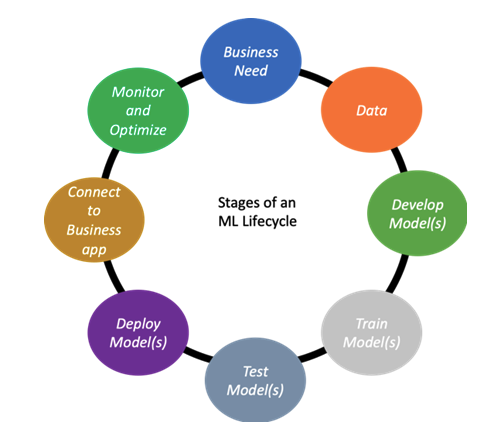

Last weeks we focused on: preprocessing, visualization & analysis

Today: ML

# Machine learning

We are given a dataset and would like to perform a task with it.

## Basic Example - House Price Prediction
Given: a dataset of N samples
$(x_1,y_1),...(x_n,y_n)$

$x - square$

$y - price$

Task: what is the price of house that has $x$ square ?

### One dimensional

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(162)
# Create data
N = 25
x = np.random.rand(N)*100
y = x**2 + np.random.normal(1,2,size=N)*100
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('House Price Vs Square')
plt.xlabel('Square')
plt.ylabel('Price')
plt.show()

$x=60$ ?

### More Features
Now what if we know the age of the house ?

$(age,square)\rightarrow price$

In [ ]:
import plotly.express as px

# Create data
np.random.seed(162)
N = 25
x = np.random.rand(N)*100
age = np.random.rand(N)*18
y = x**2 + 0.5*age + np.random.normal(1,2,size=N)*100
colors = (0,0,0)
area = np.pi*3

#Plotting
fig = px.scatter_3d(x=x, y=age, z=y,color=y,labels={'x':'square', 'y':'age', 'z':'price'},width=800, height=500)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### High Dimensional Features
$x\in R^d$

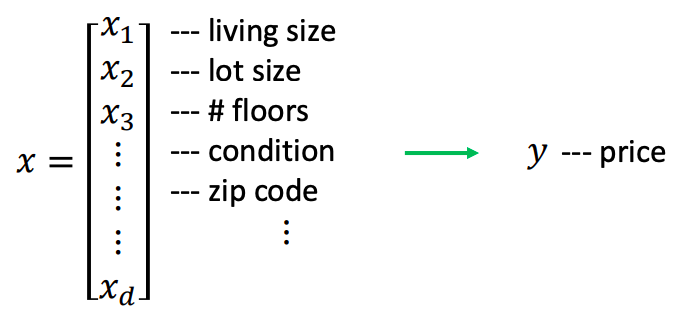

## Classical ML

![img](https://i.vas3k.ru/7w1.jpg )
<!-- <img src="https://i.vas3k.ru/7w1.jpg" width="600" height="600" /> -->




### Supervised

#### Classification
Today used for:
* Spam filtering
* Language detection
* Sentiment analysis
* Recognition of handwritten characters and numbers
* Fraud detection

Popular algorithms: Naive Bayes, Decision Tree, Logistic Regression, K-Nearest Neighbours, Support Vector Machine, DNN (Deep Neural Networks)

![](https://i.vas3k.ru/7qx.jpg)

![](https://i.vas3k.ru/7w3.jpg)

Image Classification (CIFAR10 dataset)

![](https://pytorch.org/tutorials/_images/cifar10.png)


#### Regression

Today this is used for:

* Stock price forecasts
* Demand and sales volume analysis
* Medical diagnosis
* Any number-time correlations

![](https://i.vas3k.ru/7qy.jpg)

![](https://i.vas3k.ru/7w5.jpg)

### Unsupervised

#### Clustering
Nowadays used:

* For market segmentation (types of customers, loyalty)
* To merge close points on a map
* To analyze and label new data
* To detect abnormal behavior

![](https://i.vas3k.ru/7qz.jpg)

#### Dimensionality Reduction
Used for:
* Recommender systems
* Beautiful visualizations
* Topic modeling and similar document search
* Fake image analysis
* signal analysis

![](https://i.vas3k.ru/7r0.jpg)

Popular algorithms: Principal Component Analysis (PCA), Singular Value Decomposition (SVD), Latent Dirichlet allocation (LDA), Latent Semantic Analysis (LSA, pLSA, GLSA), t-SNE (for visualization)

# scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a library that allows you to do machine learning, that is, make predictions from data, in Python. There are four basic machine learning tasks:

 1. Regression: predict a number from datapoints, given datapoints and corresponding numbers
 2. Classification: predict a category from datapoints, given datapoints and corresponding numbers
 3. Clustering: predict a category from datapoints, given only datapoints
 4. Dimensionality reduction: make datapoints lower-dimensional so that we can visualize the data

![](https://scikit-learn.org/stable/_static/ml_map.png)

## Scikit-learn: theory

*   Comprehensive library for machine learning
*   Computation pipeline is as follows:
  *   Choose model
  *   Select model’s hyper-parameters
  *   Arrange data into feature matrix + target vector
  *   Fit the model to data using the fit() method
  *   Predict labels for unknown data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Regression

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
print(diabetes.DESCR)

In [ ]:
df_diabetes = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = pd.Series(diabetes.target)
df_diabetes.head()

In [ ]:
df_diabetes['target'].plot(kind='hist')

In [ ]:
df_diabetes.plot('bmi', 'target', kind='scatter')

In [ ]:
X = diabetes.data[:,[2]]
Y = diabetes.target

In [ ]:
X = df_diabetes[['bmi']].to_numpy()
y = df_diabetes['target'].to_numpy()

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, Y)
print(model.coef_, model.intercept_)

In [ ]:
print(model.score(X, Y))

In [ ]:
model.predict(np.array([[0.05], [-0.02]]))

In [ ]:
df_diabetes.plot('bmi', 'target', kind='scatter')

bmi = np.linspace(-0.1, 0.15, 20).reshape(-1, 1)
plt.plot(bmi, model.predict(bmi), 'r')

## Classification

Another example of a machine learning problem is classification. Here we will use a dataset of flower measurements from three different flower species of *Iris* (*Iris setosa*, *Iris virginica*, and *Iris versicolor*). We aim to predict the species of the flower. Because the species is not a numerical output, it is not a regression problem, but a classification problem.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

In [ ]:
X = iris.data[:, :2]
y = iris.target_names[iris.target]

In [ ]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend();

In [ ]:
X = iris.data[:, 2:]
y = iris.target_names[iris.target]
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend();

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)

In [ ]:
model.predict(X_test)

### Evaluating your model

In [ ]:
np.mean(model.predict(X_test) == y_test)  # Accuracy

In [ ]:
import sklearn.metrics as metrics
metrics.accuracy_score(model.predict(X_test), y_test)

In [ ]:
print(metrics.classification_report(model.predict(X_test), y_test))

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png)

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()
scores = cross_val_score(model, X, y, cv=5)
scores

In [ ]:
print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")

## Clustering

Clustering is useful if we don't have a dataset labelled with the categories we want to predict, but we nevertheless expect there to be a certain number of categories. For example, suppose we have the previous dataset, but we are missing the labels. We can use a clustering algorithm like k-means to *cluster* the datapoints. Because we don't have labels, clustering is what is called an **unsupervised learning** algorithm.

In [ ]:
X = iris.data

In [ ]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

In [ ]:
model.labels_

In [ ]:
iris.target

In [ ]:
for name in [0,1,2]:
    plt.scatter(X[model.labels_ == name, 0], X[model.labels_ == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [ ]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

## Dimensionality reduction (PCA)

Dimensionality reduction is another unsupervised learning problem (that is, it does not require labels). It aims to project datapoints into a lower dimensional space while preserving distances between datapoints.

Lets take a look at the breast cancer dataset with dimensionality reduction

In [ ]:
bc = datasets.load_breast_cancer()

In [ ]:
print(bc.DESCR)

In [ ]:
X = bc.data
Y = bc.target_names[bc.target]

In [ ]:
bc.feature_names

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the features

In [ ]:
np.mean(X,axis=0),np.std(X,axis=0)

In [ ]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
X_PCA = pca_breast.fit_transform(X)

In [ ]:
pd.DataFrame(data = X_PCA, columns = ['pc_1', 'pc_2'])

In [ ]:
for name in bc.target_names:
    plt.scatter(X_PCA[y == name, 0], X_PCA[y == name, 1], label=name)
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.33,random_state=1)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x_train,y_train)
print('accuracy:', clf.score(x_test,y_test))
tree.plot_tree(clf)

In [ ]:
np.count_nonzero(y_train=='benign')